### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'    # 폰트 파일의 경로
font = fm.FontProperties(fname = font_path ).get_name()    
# 경로에서 폰트 파일을 읽어와서 폰트 속성 개체를 만듦 -> 폰트 파일 내부 이름을 가져옴
matplotlib.rc('font', family=font)

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [3]:
# 1-1. 데이터셋 로드
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09
...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57,독일,0.20
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37,대한민국,0.09
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27,독일,0.09
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 9:01,독일,0.06


In [4]:
#1-1-1. 메타데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2   Category      120 non-null    object 
 3   Quantity      120 non-null    int64  
 4   Price         120 non-null    int64  
 5   CustomerID    120 non-null    int64  
 6   Birthdate     120 non-null    object 
 7   OrderDate     120 non-null    object 
 8   Country       120 non-null    object 
 9   DiscountRate  119 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 9.5+ KB


In [5]:
# 1-2. 상위 5개 데이터 출력
df.head(5)

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09


In [6]:
# 2-1. 결측값 있는 열 확인
df.isnull().sum()   # DiscountRate에서 결측치 1개 발견
df[df['DiscountRate'].isnull()]     # 52번 인덱스 - 초콜릿에서 확인

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
52,53,초콜릿,Food,5,33000,1029,1990-01-03,2024-03-01 22:02,독일,NaN


In [7]:
# 2-2. 결측값 처리 -> 최빈값으로 대체
print(df[df['Product'] == '초콜릿']['DiscountRate'].value_counts())

mask = df['Product'] == '초콜릿'
df.loc[mask, 'DiscountRate'] = df.loc[mask, 'DiscountRate'].fillna(0.29)
df.isnull().sum() 

df[df['Product'] == '초콜릿']

DiscountRate
0.29    2
0.20    1
0.14    1
0.06    1
Name: count, dtype: int64


,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
32,33,초콜릿,Food,5,47000,1007,1999-04-27,2023-12-30 12:13,일본,0.29
46,47,초콜릿,Food,1,17000,1673,1998-09-29,2023-12-05 23:14,중국,0.20
52,53,초콜릿,Food,5,33000,1029,1990-01-03,2024-03-01 22:02,독일,0.29
70,71,초콜릿,Food,4,16000,1560,1984-02-09,2024-08-23 2:17,중국,0.14
71,72,초콜릿,Food,1,48000,1696,1976-03-09,2024-06-06 9:59,대한민국,0.29
76,77,초콜릿,Food,1,32000,1038,1995-08-13,2024-05-17 6:10,일본,0.06


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [8]:
#1. 매출액 컬럼 생성

df['TotalRevenue'] = df['Quantity'] * df['Price']
df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,TotalRevenue
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14,185000
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29,100000
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23,32000
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20,8000
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09,78000
...,...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57,독일,0.20,33000
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37,대한민국,0.09,164000
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27,독일,0.09,33000
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 9:01,독일,0.06,86000


In [9]:
#2-1. 월별 총 매출액 집계
# - 힌트 : resample()을 사용해서 월별로 데이터 집계
df['OrderDate'] = pd.to_datetime(df['OrderDate'])   # 메타데이터 확인 결과, 날짜가 object로 표시되어 있음.
df.set_index('OrderDate', inplace=True)
monthly_r = df['TotalRevenue'].resample('ME').sum()

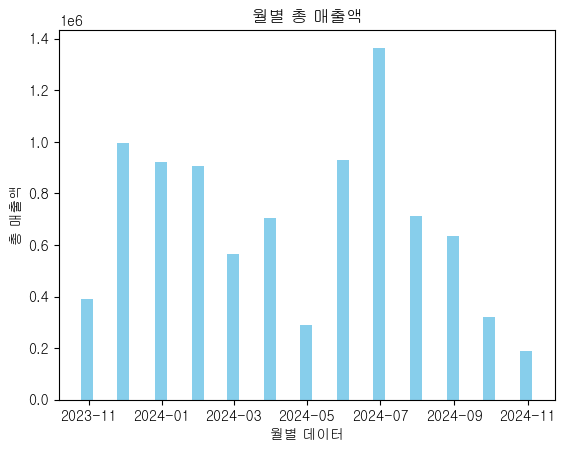

In [10]:
#2-2. 월별 총 매출액 시각화
plt.title('월별 총 매출액')
plt.xlabel('월별 데이터')
plt.ylabel('총 매출액')
plt.bar(monthly_r.index, monthly_r.values, color='skyblue', width=10)
plt.show()

In [11]:
#3. 카테고리별 최대 매출액 상위 3개 카테고리 구하기
category_max = df.groupby('Category')['TotalRevenue'].sum()
category_max.sort_values(ascending=False).head(3)

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64

In [12]:
# 4. 국가별 총 매출액 계산 & 매출액 상위 5개 국가 출력
country_max = df.groupby('Country')['TotalRevenue'].sum()
country_max.sort_values(ascending=False).head(5)

Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [13]:
#1. 고객별 총 매출액 계산 후, 상위 5명 출력

customer_r = df.groupby('CustomerID')['TotalRevenue'].sum()
customer_r.sort_values(ascending=False).head(5)

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64

In [14]:
#2. 주문 횟수 최다 상위 5명 출력
customer_order = df.groupby('CustomerID').size()
customer_order.sort_values(ascending=False).head(5)

CustomerID
1007    2
1038    2
1141    2
1278    2
1421    2
dtype: int64

In [15]:
#3. 고객을 연령대에 따라 분류한 후, 각 연령대별 가장 많이 구매한 상품의 카테고리 구하기
# - 힌트 : 고객 연령대는 따로 제공되지 않으므로, 가정의 데이터를 추가해 임의 분류 가능
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df['TotalRevenue'] = df['Quantity'] * df['Price']
df['Birthdate'] = pd.to_datetime(df['Birthdate'])
birth_year = df['Birthdate'].dt.year

df['Age'] = 2025 - birth_year
df

df.describe()   # Age max = 62, min = 21

# 3-1. 연령대 분류
def age_group(Age):
    if 20 <= Age < 30:
        return '20대'
    elif 30 <= Age < 40:
        return '30대'
    elif 40 <= Age < 50:
        return '40대'
    elif 40 <= Age < 50:
        return '40대'
    elif 50 <= Age <60:
        return '50대'
    elif 60 <= Age < 70:
        return '60대'
    
df['AgeGroup'] = df['Age'].apply(age_group)

In [16]:
# 3-2. 각 연령대별 가장 많이 구매한 상품의 카테고리 구하기
grouped = df.groupby(['AgeGroup', 'Product', 'Category'])['Quantity'].sum()

idx = grouped.groupby('AgeGroup').idxmax()

grouped.loc[idx]

AgeGroup  Product  Category   
20대       노트북      Electronics     6
30대       과자       Food           13
40대       향수       Beauty         13
50대       셔츠       Clothing       11
60대       향수       Beauty          4
Name: Quantity, dtype: int64

4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [17]:
# 1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
product_sale = df.groupby('Product')['Quantity'].sum()
product_sale.sort_values(ascending=False).head(5)

Product
셔츠     25
립스틱    22
소설     21
커피     20
역사책    20
Name: Quantity, dtype: int64

In [18]:
# 2. 카테고리별 가장 많이 판매된 상품
category_sale = df.groupby(['Category', 'Product'])['Quantity'].sum()
most_category = category_sale.groupby(level=0).idxmax()
print(most_category)

Category
Beauty              (Beauty, 립스틱)
Books                 (Books, 소설)
Clothing           (Clothing, 셔츠)
Electronics    (Electronics, 노트북)
Food                   (Food, 커피)
Sports             (Sports, 요가매트)
Name: Quantity, dtype: object


In [19]:
#3. 평균 구매 수량이 가장 높은 상위 3개 상품 출력
product_mean = df.groupby('Product')['Quantity'].mean()
product_mean.sort_values(ascending=False).head(3)

Product
주스      5.0
자기계발    5.0
요가매트    4.0
Name: Quantity, dtype: float64

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

In [25]:
#1-1. 데이터 재로드 (2번에서 시각화 과정을 거치면서 데이터 배열이 바뀜))
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df['TotalRevenue'] = df['Quantity'] * df['Price']
df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,TotalRevenue
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14,185000
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29,100000
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23,32000
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20,8000
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09,78000
...,...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57,독일,0.20,33000
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37,대한민국,0.09,164000
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27,독일,0.09,33000
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 9:01,독일,0.06,86000


In [21]:
#1-2. 주문 날짜별로 주별 매출액 계산
df['OrderDate'] = pd.to_datetime(df['OrderDate'])   # 메타데이터 확인 결과, 날짜가 object로 표시되어 있음.
df.set_index('OrderDate', inplace=True)
weekly_r = df['TotalRevenue'].resample('W').sum()

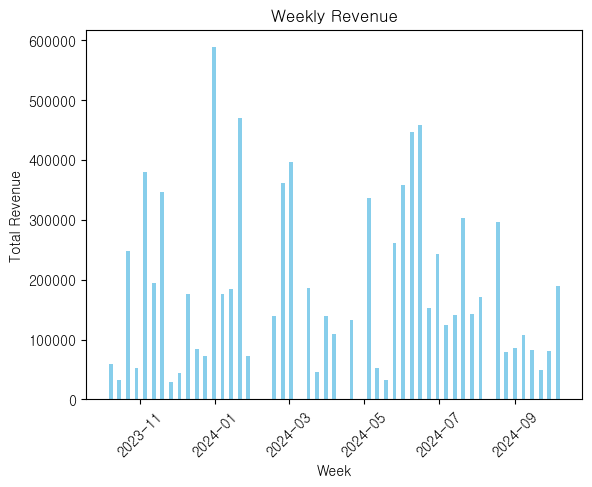

In [22]:
#1-3. 주별 매출액 시각화
plt.title('Weekly Revenue')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.bar(weekly_r.index, weekly_r.values, color='skyblue', width=3)
plt.xticks(rotation=45)
plt.show()

In [23]:
#2. 특정 기간 동안의 매출 추이 분석

# 이건 도저히!!

In [26]:
#3. 특정 국가에서 가장 많이 주문한 시간대 분석 -> 시각화 -> 인사이트 도출
df['Country'].value_counts()

# 3-1. 국가 선정 및 시간대 분석 : 독일로 선정!
germany = df[df['Country'] == '독일'].copy()
germany['OrderDate'] = pd.to_datetime(germany['OrderDate'])
germany['Hour'] = germany['OrderDate'].dt.hour 
hourly_orders = germany['Hour'].value_counts().sort_index()

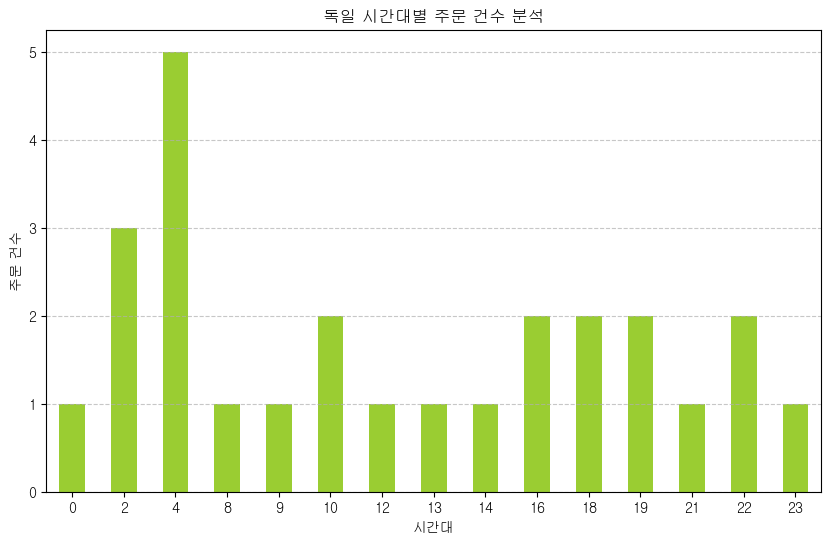

In [ ]:
#3-2. 시각화

plt.figure(figsize=(10,6))
hourly_orders.plot(kind='bar', color='yellowgreen')
plt.title('독일 시간대별 주문 건수 분석')
plt.xlabel('시간대')
plt.ylabel('주문 건수')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [ ]:
#1. 고객의 재구매율(= 한 고객이 여러 번 주문한 비율) 분석
# 주문 횟수 카운트
order_count = df['CustomerID'].value_counts()

# 주문 횟수 2번 이상
repurchase = (order_count >= 2).sum()

# 재구매율
repurchase_rate = repurchase / order_count.shape[0]
print(repurchase_rate*100)

8.108108108108109
